<a href="https://colab.research.google.com/github/siggu/Python/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_6_%EC%96%B4%EB%A0%88%EC%9D%B4_%EC%A4%91%EC%8B%AC_%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%B0%8D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6. 어레이 중심 프로그래밍

연산과 함수 호출에 사용되는 넘파이 어레이는 기본적으로 항목 단위로 연산과 함수 호출이 이루어진다. 넘파이 어레이의 이런 특징을 잘 활용하도록 유도하는 프로그래밍을 **어레이 중심 프로그래밍**(array-oriented programming)이라고 한다.

**주요 내용**

- 유니버설 함수 : 항목별 함수 적용
- 통계
- 정렬
- 선형대수
- 난수 생성

**기본 설정**


In [2]:
# 넘파이
import numpy as np

# 램덤 시드
np.random.seed(12345)

# 어레이 사용되는 부동소수점들의 정확도 지정
np.set_printoptions(precision=4, suppress=True)

# 파이플롯
import matplotlib.pyplot as plt

# 도표 크기 지정
plt.rc('figure', figsize=(10, 6))

## 6.1 유니버설 함수  
유니버설 함수는 어레이의 항목 각각에 대해 적용되는 함수이며, 반환값은 인자로 사용된 어레이와 동일한 모양의 어레이로 구현된다. 유니버설 함수를 줄여서 __ufunc__라 부른다. 60개 이상의 유니버설 함수가 존재하며, 그중 상당수가 수학 관련 함수이다. 

먼저 (2,5) 모양의 어레이를 하나 생성하자.


In [4]:
arr = np.arange(10).reshape(2,5)
arr

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

`np.sqrt()` 함수

주어진 어레이 각 항목의 제곱근으로 이루어진 어레이가 반환된다.

In [5]:
np.sqrt(arr)

array([[0.    , 1.    , 1.4142, 1.7321, 2.    ],
       [2.2361, 2.4495, 2.6458, 2.8284, 3.    ]])

`np.exp()` 함수

주어진 어레이 각 항목을 지수로 사용하는 지수승의 값으로 이루어진 어레이가 반환된다. 단, 밑은 오일러 상수 `e`가 사용된다.

In [6]:
np.exp(arr)

array([[   1.    ,    2.7183,    7.3891,   20.0855,   54.5982],
       [ 148.4132,  403.4288, 1096.6332, 2980.958 , 8103.0839]])

`np.maximum()` 함수

여러 개의 어레이를 인자로 받는 함수에 대해서도 동일한 방식으로 작동한다. 예를 들어, `maximum()` 함수는 항목별 최댓값으로 이루어진 어레이를 반환한다.

In [7]:
x = np.random.randn(8).reshape((4,2))
y = np.random.randn(8).reshape((4,2))

In [8]:
x

array([[-0.2047,  0.4789],
       [-0.5194, -0.5557],
       [ 1.9658,  1.3934],
       [ 0.0929,  0.2817]])

In [9]:
y

array([[ 0.769 ,  1.2464],
       [ 1.0072, -1.2962],
       [ 0.275 ,  0.2289],
       [ 1.3529,  0.8864]])

In [10]:
np.maximum(x,y)

array([[ 0.769 ,  1.2464],
       [ 1.0072, -0.5557],
       [ 1.9658,  1.3934],
       [ 1.3529,  0.8864]])

`np.divmod()` 함수

여러 개의 어레이를 반환하는 유니버설 함수도 있다. 예를 들어, `divmod()` 함수는 어레이 나눗셈 실행 결과를 항목별 나눗셈의 몫으로 이루어진 어레이와 나머지로 이루어진 어레이의 튜플을 반환한다.

먼저 (2, 4) 모양의 어레이를 하나 만들자

In [11]:
arr = np.arange(10, 32, 3).reshape(2,4)
arr

array([[10, 13, 16, 19],
       [22, 25, 28, 31]])

위 어레이를 3으로 나누면 모든 항목 각각에 대한 몫과 나머지를 각각 따로 모아 두 개의 어레이로 이루어진 튜플을 반환한다.

In [12]:
np.divmod(arr,3)

(array([[ 3,  4,  5,  6],
        [ 7,  8,  9, 10]]), array([[1, 1, 1, 1],
        [1, 1, 1, 1]]))

두 어레이의 나눗셈도 가능하다.

In [14]:
arr2 = np.arange(2,10).reshape(2,4)
arr2

array([[2, 3, 4, 5],
       [6, 7, 8, 9]])

In [15]:
np.divmod(arr, arr2)

(array([[5, 4, 4, 3],
        [3, 3, 3, 3]]), array([[0, 1, 0, 4],
        [4, 4, 4, 4]]))

부동소수점의 나눗셈에 대해서도 몫과 나머지를 구한다.

In [18]:
arr3 = np.arange(10, 30, 2.5).reshape(2,4)
arr3

array([[10. , 12.5, 15. , 17.5],
       [20. , 22.5, 25. , 27.5]])

In [19]:
arr4 = np.arange(2, 4.3, 0.3).reshape(2,4)
arr4

array([[2. , 2.3, 2.6, 2.9],
       [3.2, 3.5, 3.8, 4.1]])

In [20]:
np.divmod(arr3, arr4)

(array([[5., 5., 5., 6.],
        [6., 6., 6., 6.]]), array([[0. , 1. , 2. , 0.1],
        [0.8, 1.5, 2.2, 2.9]]))

**예제 : 2차원 격자 어레이**

어레이를 중심으로 프로그래밍을 하면 예를 들어 많은 `for` 반복문을 생략할 수 있으며, 결과적으로 보다 효율적으로 코드를 구현할 수 있다. 또한 구현된 프로그램은 리스트를 이용하는 프로그램보다 빠르고 메모리 효율적으로 실행된다. 여기서는 몇 가지 예제를 이용하여 어레이 중심 프로그래밍을 소개한다.

아래 모양의 격자무늬에 해당하는 2차원 어레이를 생성하고자 한다. 각 점의 좌표는 -1과 1 사이의 값을 20개의 구간으로 균등하게 나눈 값들이다. 즉, 가로 세로 모두 21개의 점으로 구성된다.

**주의사항** : `for` 반복문을 전혀 사용하지 않아야 한다.

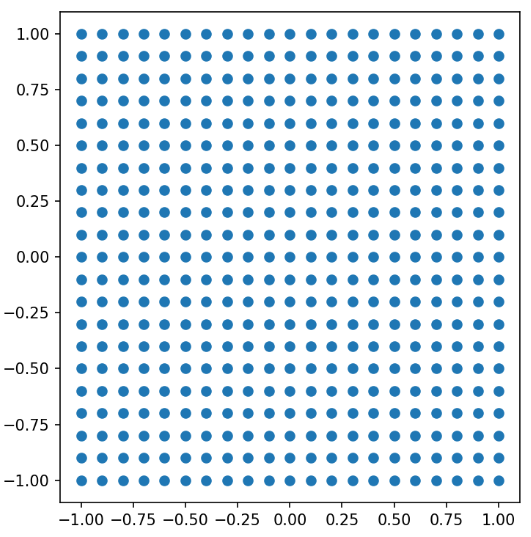

먼저 `arange()` 함수를 이용하여 -1와 1 사이의 구간을 20개의 구간으로 균등하게 나누는 어레이를 생성하려면 아래처럼 -1에서 1.1 이전까지 0.1 스텝으로 증가하는 갓들로 이루어진 어레이를 생성하면 된다.

In [21]:
points = np.arange(-1, 1.1, 0.1)
points

array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, -0. ,
        0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

`np.meshgrid()` 함수

`np.meshgrid()` 함수는 지정된 1차원 어레이 두 개를 이용하여 격자무늬의 좌표를 생성한다. 즉, 격자에 사용되는 점들의 x좌표와 y좌표를 따로따로 모아 두 개의 어레이를 반환한다.

In [22]:
xs, ys = np.meshgrid(points, points)

In [23]:
xs

array([[-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, -0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ],
       [-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, -0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ],
       [-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, -0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ],
       [-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, -0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ],
       [-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, -0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ],
       [-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, -0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ],
       [-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, -0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ],

In [24]:
ys

array([[-1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. ,
        -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. ],
       [-0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9,
        -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9],
       [-0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8,
        -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8],
       [-0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7,
        -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7],
       [-0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6,
        -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6],
       [-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5,
        -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5],
       [-0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4,
        -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4],

xs와 ys를 이용하여 산점도를 그리면 원하는 격자무늬가 얻어진다.

In [28]:
# 도표 크기 지정
plt.rc('figure', figsize=(6,6))

# 산점도 그리기
plt.scatter(xs, ys)
plt.show()

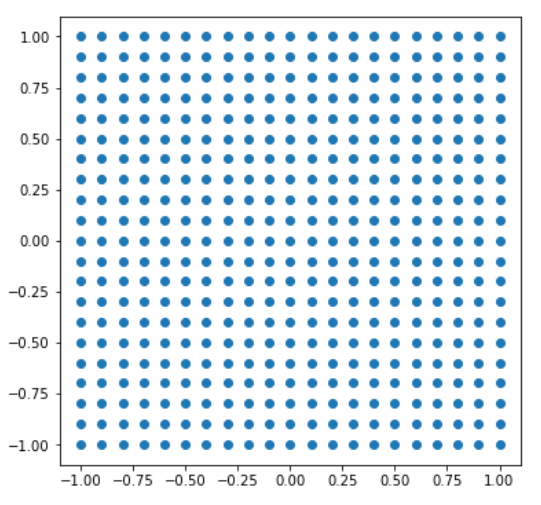

**예제** : 2차원 이미지 그리기

xs와 ys 각각의 제곱을 합하여 제곱근을 구하면 21x21 크기의 대칭 어레이가 얻어진다.

In [29]:
z = np.sqrt(xs ** 2 + ys ** 2)
z.shape

(21, 21)

`z`를 흑백사진으로 표현하면 다음과 같다. `21x21` 크기의 해상도를 가진 흑백사진의 명암 대비를 쉽게 알아볼 수 있는 사진이 생성된다.

In [32]:
# 도표 크기 지정(기본값으로 되돌림)
plt.rc('figure', figsize=(10, 6))

# 흑백사진으로 보여주도록 함.
plt.imshow(z, cmap=plt.cm.gray, extent=[-1, 1, 1, -1])
# 컬러바(색상 지도)도 보여줄 수 있음.
plt.colorbar()
# 도표 타이틀 지정(한글 지원은 좀 복잡함)
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

plt.show()

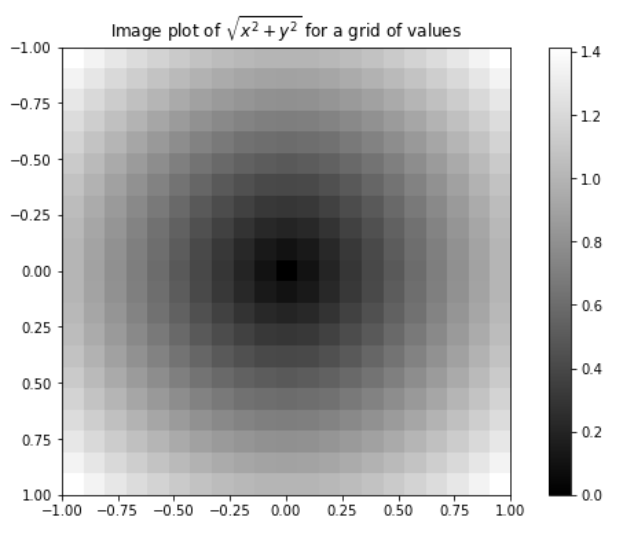

**예제**

-1부터 1 사이의 구간은 0.02 크기로 총 100개의 구간으로 구성한 다음에 동일한 그래프를 그리면 훨씬 더 섬세한 사진을 얻는다.

In [33]:
points = np.arange(-1, 1.01, 0.02)
points.shape

(101,)

`meshgrid()` 함수를 이용하여 메쉬 생성에 필요한 x 좌표와 y 좌표 모음을 만든다.

In [36]:
xs, ys = np.meshgrid(points, points)

`xs` 와 `ys` 각각 (101, 101) 모양의 2차원 어레이다.

In [37]:
xs.shape

(101, 101)

In [39]:
ys.shape

(101, 101)

xs와 ys를 이용하여 산점도를 그리면 한 장의 색종이를 얻는다. 이유는 픽셀이 촘촘하기 때문이다.

In [40]:
# 도표 크기 지정
plt.rc('figure', figsize=(6, 6))

# 산점도 그리기
plt.scatter(xs, ys)
plt.show()

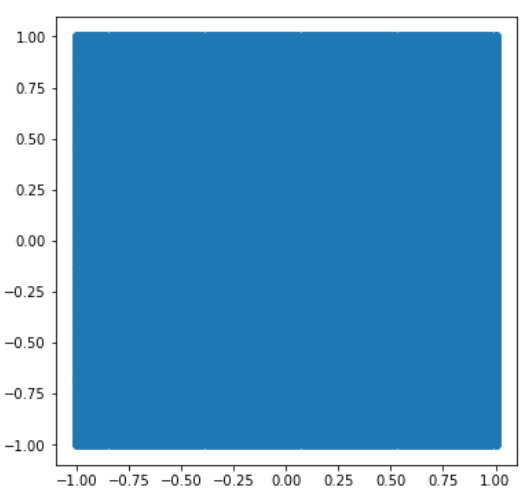

등고선 모양의 이미지를 생성하기 위해 xs와 ys 각각의 제곱을 합하여 제곱근을 구하면 101x101 모양의 2차원 대칭 어레이가 얻어진다.

In [44]:
z = np.sqrt(xs ** 2 + ys ** 2)
z.shape

(101, 101)

`z`를 흑백사진으로 표현하면 다음과 같다.

In [45]:
# 도표 크기 지정(기본값으로 되돌림)
plt.rc('figure', figsize=(10, 6))

# 흑백사진으로 보여주도록 함.
plt.imshow(z, cmap=plt.cm.gray, extent=[-1, 1, 1, -1])
# 컬러바(색상 지도)도 보여줄 수 있음.
plt.colorbar()
# 도표 타이틀 지정(한글 지원은 좀 복잡함)
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

plt.show()

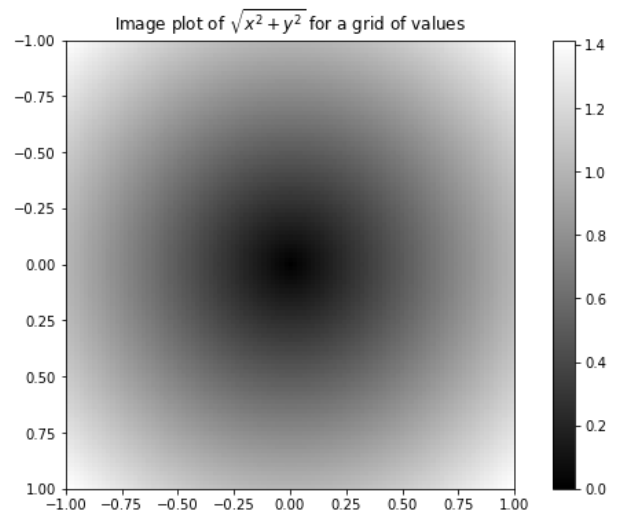

## 6.2. 통계

넘파이 어레이에 사용된 항목들의 합(sum), 평균값(mean), 표준편차(std) 등 기본 통계함수를 지원한다.

연습을 위해 먼저 (3,3) 모양의 어레이를 무작위로 생성한다.

In [47]:
arr = np.arange(1,7).reshape(2,3)
arr

array([[1, 2, 3],
       [4, 5, 6]])

`mean()` 메서드

어레이에 포함된 모든 값들의 평균값을 계산한다.

In [48]:
arr.mean()

3.5

**참고** : `np.maen()` 함수를 호출하면 어레이 객체에 포함된 `mean()` 메서드가 사용된다.

In [49]:
np.mean(arr)

3.5

`sum()` 메서드

어레이에 포함된 모든 값들의 합을 계산한다.

In [50]:
arr.sum()

21

`cumsum()` 메서드

어레이에 포함된 모든 값들의 누적합을 계산한다.

In [51]:
arr.cumsum()

array([ 1,  3,  6, 10, 15, 21])

`cumprod()` 메서드

어레이에 포함된 모든 값들의 누적곱을 계산한다.

In [52]:
arr.cumprod()

array([  1,   2,   6,  24, 120, 720])

**축(axis) 활용**

앞서 언급된 모든 함수는 축(axis)을 이용한 함수 적용도 지원한다. 즉, 축을 지정하여 축에 따른 결과를 모든 어레이를 생성한다. 축 지정은 `axis` 키워드 인자를 사용한다.

- `axis = 0` : 행을 기준으로 함수 적용
- `axis = 1` : 열을 기준으로 함수 적용

**평균값**

- 열별 평균값 계산 : 행을 따라 평균값을 계산해야 하기에 `axis = 0` 지정

In [53]:
arr.mean(axis=0)

array([2.5, 3.5, 4.5])

- 행별 평균값 계산 : 열을 따라 평균값을 계산해야 하기에 `axis=1` 지정

In [55]:
arr.mean(axis=1)

array([2., 5.])

**누적합**

- 열별 항목의 누적합 계산 : 행을 따라 항목들의 누적합을 계산해야 하기에 `axis=0`지정

In [56]:
arr.cumsum(axis=0)

array([[1, 2, 3],
       [5, 7, 9]])

- 행별 항목의 누적합 계산 : 열을 따라 항목들의 누적합을 계산해야 하기에 `axis=1`지정

In [57]:
arr.cumsum(axis=1)

array([[ 1,  3,  6],
       [ 4,  9, 15]])

**누적곱**

- 열별 항목의 누적곱 계산 : 행을 따라 항목들의 누적곱을 계산해야 하기에 `axis=0`지정

In [58]:
arr.cumprod(axis=0)

array([[ 1,  2,  3],
       [ 4, 10, 18]])

- 행별 항목의 누적곱 계산 : 열을 따라 항목들의 누적곱을 계산해야 하기에 `aixs=1` 지정

In [59]:
arr.cumprod(axis=1)

array([[  1,   2,   6],
       [  4,  20, 120]])

## 6.3. 부울 어레이

**참인 항목의 개수**

특정 조건을 만족하는 항목들의 개수를 구하는 과정은 다음과 같다.

- 부울 연산식을 이용하여 조건 구현
- `sum()` 메서드 활용 가능. 이유는 `True`는 `, `False`는 0으로 간주되기 때문

아래 코드는 임의로 생성된 100개의 부동소수점 중에서 양수의 개수를 계산한다.

In [60]:
arr = np.random.randn(100)
(arr > 0).sum()

50

`any()`와 `all()` 메서드

- `any()` 메서드 : 부울 어레이에 포함된 항목이 하나라도 참이면 참을 반환
- `all()` 메서드 : 부울 어레이에 포함된 항목이 모두 참이면 참을 반환

In [61]:
bools = np.array([False, False, True, False])

In [62]:
bools.any()

True

In [63]:
bools.all()

False

## 6.4. 정렬
`sort()` 메서드

정해진 축을 기준으로 오름차순으로 정렬할 때 사용한다. 물론 1차원 어레이는 축을 지정할 필요가 없다.

In [64]:
arr = np.random.randn(6)
arr

array([ 0.2205, -0.1934,  0.6692, -1.649 , -2.2528, -1.1668])

In [66]:
arr.sort()
arr

array([-2.2528, -1.649 , -1.1668, -0.1934,  0.2205,  0.6692])

다차원 어레이는 축을 이용하여 행 또는 열 기준으로 정렬할 수 있다.

In [67]:
arr = np.random.randn(5,3)
arr

array([[ 0.3536,  0.7021, -0.2746],
       [-0.1391,  0.1077, -0.6065],
       [-0.4171, -0.017 , -1.2241],
       [-1.8008,  1.6347,  0.989 ],
       [ 0.4579,  0.5552,  1.3067]])

행을 따라 정렬하려면 인자 0을 사용한다.

In [70]:
arr.sort(0)
arr

array([[-1.8008, -0.4171, -0.017 ],
       [-1.2241, -0.1391,  0.1077],
       [-0.6065,  0.3536,  0.7021],
       [-0.2746,  0.5552,  1.3067],
       [ 0.4579,  0.989 ,  1.6347]])

**주의사항** : `sort()` 메서드는 기존의 어레이를 직접 변환한다. 즉, `arr`이 직접 변경된다.

In [71]:
arr

array([[-1.8008, -0.4171, -0.017 ],
       [-1.2241, -0.1391,  0.1077],
       [-0.6065,  0.3536,  0.7021],
       [-0.2746,  0.5552,  1.3067],
       [ 0.4579,  0.989 ,  1.6347]])

열을 따라 정렬하면 인자 1을 사용한다.

In [72]:
arr.sort(1)

**예제**

어레이에 사용된 값들의 백분위수를 정렬을 이용하여 쉽게 구할 수 있다.

예를 들어, 임의로 생성된 1,000개의 부동 소수점들 중에서 하위 5%에 해당하는 수를 구해보자.

In [73]:
large_arr = np.random.randn(1000)

먼저 정렬한 다음에 하위 5%에 해당하는 위치를 구하여 인덱싱하면 바로 답이 나온다.

In [74]:
large_arr.sort()

하위 5%의 위치는 어레이의 길이에 0.05를 곱해준 값에 해당한다. 인덱스로 사용해야 하기에 정수로 형변환해주면 되며, 예상한 대로 50번 인덱스의 값을 가리킨다.

In [75]:
five_from_bottom = int(0.05 * len(large_arr))
five_from_bottom

50

따라서 하위 5%에 해당하는 값은 아래와 같다.

In [76]:
large_arr[five_from_bottom]

-1.4995034502869655

`argmax()`/`argmin()` 메서드

각각 지정된 축을 기준으로 항목들을 가장 큰/작은 값의 항목이 위치한 인덱스를 반환한다.

In [77]:
np.random.seed(18)
arr = np.random.randint(11, 99, (2,3))
arr

array([[53, 30, 80],
       [73, 60, 57]])

축을 지정하지 않으면 전체 항목을 대상으로 하며, 반환된 값은 어레이를 1차원으로 변환했을 때의 순서를 보여준다.

아래 결과인 5는 5번 인덱스, 여기서는 마지막에 사용된 항목을 가리킨다.

In [81]:
arr.argmax()

2

In [82]:
arr.argmin()

1

축을 지정하면 축별로 인덱스를 반환한다.

예를 들어, 열별 최대 값이 위치한 인덱스는 당연히 1이 나온다. 이유는 1번 행의 값이 0번 행의 값들보다 모두 크기 때문이다.

In [83]:
arr.argmax(0)

array([1, 1, 0])

In [84]:
arr.argmin(0)

array([0, 0, 1])

반면에 행별 최대 값이 위치한 인덱스는 비슷한 이유로 2이다.

In [85]:
arr.argmax(1)

array([2, 0])

In [86]:
arr.argmin(1)

array([1, 2])

## 6.5. 선형대수
행렬곱셈, 전치 행렬, 역행렬 등을 2차원 어레이로 계산하는 방식을 간단한 예제를 이용하여 소개한다.

**행렬곱**  

먼저 두 개의 행렬을 2차원 어레이로 구현하자. 행렬 `x`는 (2, 3) 모양의 2차원 어레이다.

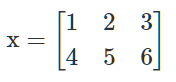

In [90]:
x = np.array([[1,2,3], [4,5,6]])
x

array([[1, 2, 3],
       [4, 5, 6]])

행렬 `y`는 (3, 2) 모양의 2차원 어레이다.

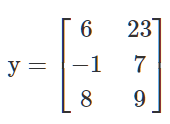

In [92]:
y = np.array([[6,23],
              [-1, 7],
              [8, 9]])
y

array([[ 6, 23],
       [-1,  7],
       [ 8,  9]])

두 행렬의 곱 `x y` 는 `dot()` 메서드를 이용하여 구한다. 결과는 (2, 2) 모양의 어레이다.

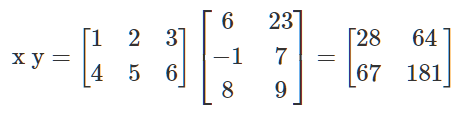

In [93]:
x.dot(y)

array([[ 28,  64],
       [ 67, 181]])

`np.dot()` 함수를 이용해도 동일한 결과를 얻는다.

In [94]:
np.dot(x,y)

array([[ 28,  64],
       [ 67, 181]])

**`@`연산자**

`np.dot()` 함수 대신 `@` 기호를 중위 연산자로 사용할 수 있다.

In [95]:
x @ y

array([[ 28,  64],
       [ 67, 181]])

**전치 어레이와 전치 행렬**

전치 행렬은 주어진 행렬의 행과 열을 서로 교환해서 얻어진다.

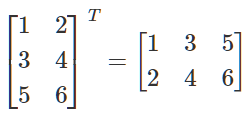

위 전치 행렬에 사용된 2차원 어레이는 아래처럼 생성할 수 있다.

In [98]:
x = np.array([[1,2], [3,4], [5,6]])
x = np.arange(1,7).reshape(3,2)
x

array([[1, 2],
       [3, 4],
       [5, 6]])

전치 행렬은 전치 어레이로 구현된다. 전치 어레이는 기존 어레이의 축을 교환하며, 뷰를 이용한다. 즉, 새로운 어레이를 생성하지 않고 기존 어레이를 읽어오는 방식을 달리한다.

In [99]:
x.T

array([[1, 3, 5],
       [2, 4, 6]])

In [102]:
y = np.arange(-6,0).reshape(2,3)
y

array([[-6, -5, -4],
       [-3, -2, -1]])

In [103]:
y.T

array([[-6, -3],
       [-5, -2],
       [-4, -1]])

`x y`의 전치 행렬은 `y`의 전치 행렬과 `x`의 전치 행렬의 곱이다.

In [104]:
((x @ y).T == y.T @ x.T).all()

True

**역행렬**

역행렬은 `numpy.linalg` 모듈에 포함된 `inv()` 함수를 이용하여 구한다.

In [105]:
from numpy.linalg import inv

X = np.random.randn(5, 5)
X

array([[-0.0327, -0.2185,  1.1416,  0.2258,  2.135 ],
       [ 1.2383,  0.8959, -1.3972, -0.6551, -0.9048],
       [-1.4006,  1.5896,  0.8859,  0.1202,  0.719 ],
       [ 0.0344, -0.8945,  0.9016,  0.4296, -0.0688],
       [ 0.171 , -1.3612,  1.5464, -0.0718,  0.8127]])

In [106]:
inv(X)

array([[ 0.4433,  0.8285,  0.0122,  0.9991, -0.1682],
       [ 0.1838,  0.5443,  0.4618,  0.5646, -0.2377],
       [-0.1109,  0.49  ,  0.5088,  0.7383,  0.4493],
       [ 0.6577,  0.0075, -0.1409,  1.7921, -1.4429],
       [ 0.4838, -0.1944, -0.2097, -0.5112, -0.1146]])

`X @ (inv(X))`는 거의 항등 함수로 계산된다.

**참고** : 컴퓨터를 이용한 부동소수점 연산은 완벽함과 거리가 아주 멀다

In [107]:
X @ (inv(X))

array([[ 1., -0., -0., -0., -0.],
       [ 0.,  1.,  0.,  0., -0.],
       [ 0., -0.,  1., -0., -0.],
       [ 0., -0., -0.,  1.,  0.],
       [-0., -0., -0., -0.,  1.]])

## 6.6. 난수 생성

가장 많이 사용된 무작위 수 생성함수 3개와 시드(seed)의 역할을 살펴본다.

`np.random.randn()` 함수

임의의 부동소수점을 표준 정규 분포를 따르면서 지정된 수만큼 생성한다.

In [108]:
samples = np.random.randn(10000)
plt.hist(samples, bins=100)
plt.show()

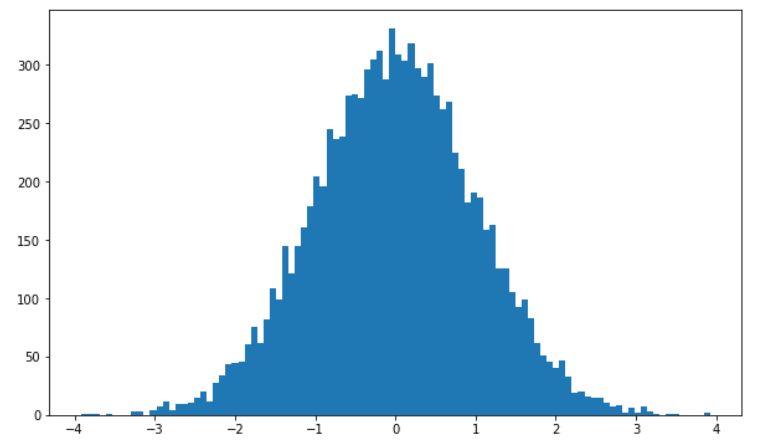

`np.random.rand()` 함수

0과 1사이의 임의의 부동소수점을 균등 분포를 따르면서 지정된 수만큼 생성한다.

In [109]:
samples = np.random.rand(10000)
plt.hist(samples, bins=100)
plt.show()

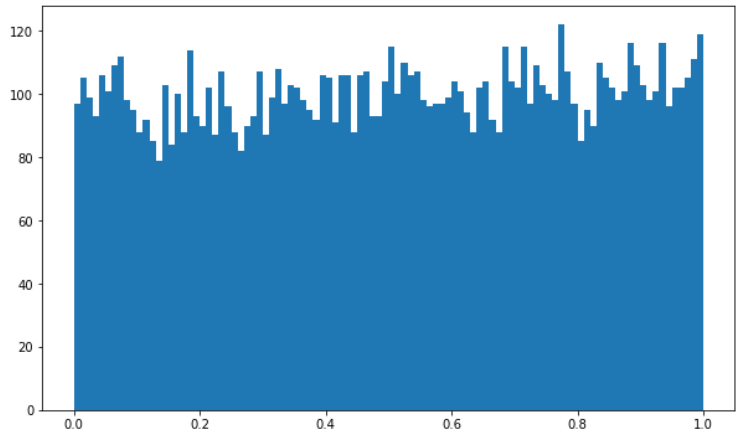

`np.random.randint()` 함수

지정된 구간 사이에서 임의의 정수를 균등 분포를 따르면서 지정된 수만큼 생성한다.

In [110]:
samples = np.random.randint(0, 100, 10000)
plt.hist(samples, bins=100)
plt.show()

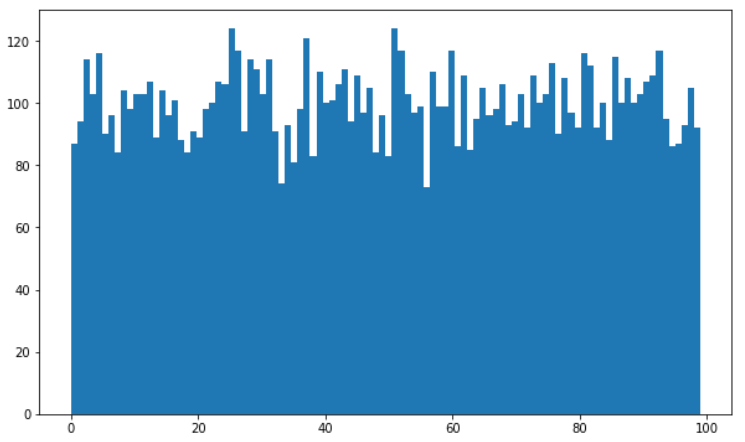

**시드(seed)**

위에서 살펴본 무작위 함수들은 모두 실행할 때마다 조금씩 다른 무작위수를 생성한다. 하지만 시드를 지정하면 무작위 수도 동일하게 결정된다. 시드는 컴퓨터가 사용하는 난수표(random number table)의 특정 지점을 지정하는 역할을 수행한다.

In [111]:
np.random.seed(1234)

samples = np.random.randn(10000)
plt.hist(samples, bins=100)
plt.show()

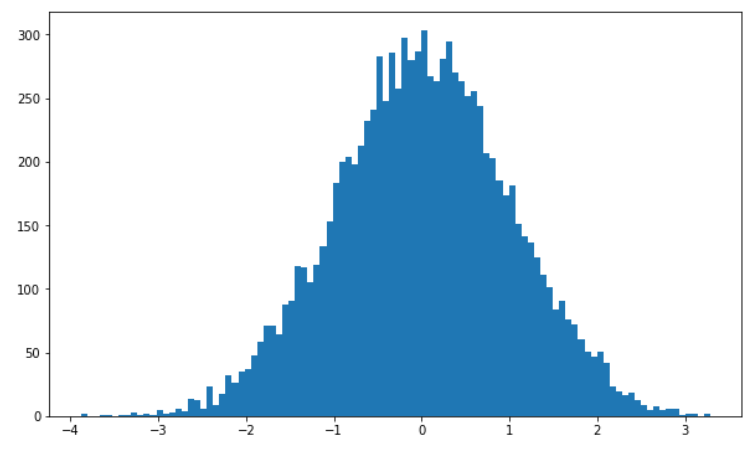

In [112]:
np.random.seed(1234)

sampels = np.random.rand(10000)
plt.hist(samples, bins=100)
plt.show()

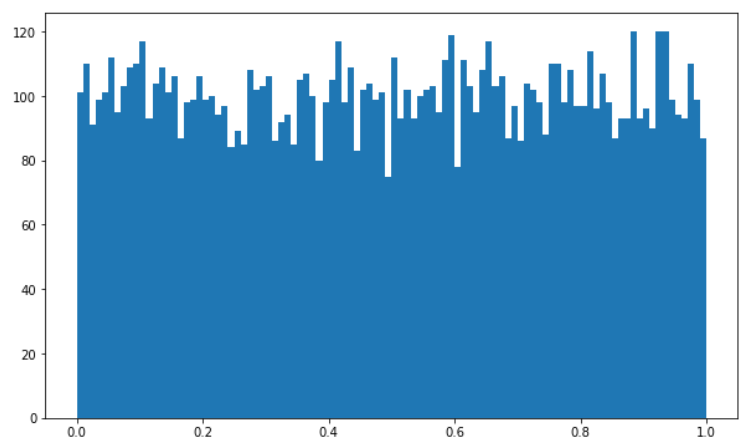

In [113]:
np.random.seed(1234)

samples = np.random.randint(0, 100, 10000)
plt.hist(samples, bins=100)
plt.show()

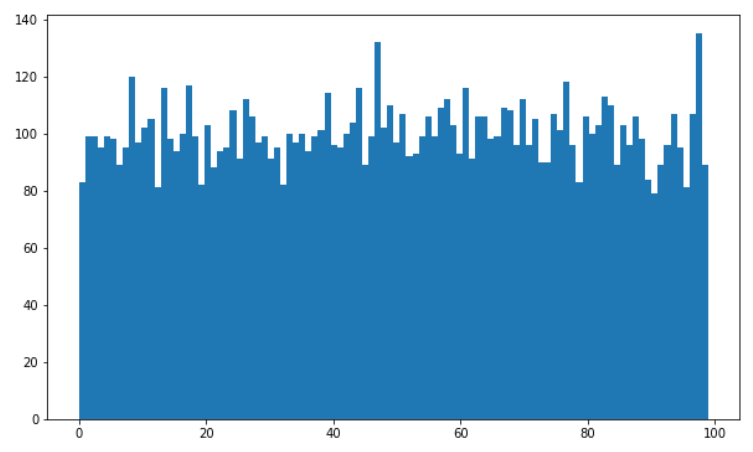

## 6.7. 연습문제

